In [ ]:
#Name:Shricharan
#Register Number - 125013036
#Date-12/03/2024
#BIN2023R01 - INTRODUCTION TO DATAMINING & MACHINE LEARNING FOR BIOINFORMATICS
#Exercise8
#Version - 1.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Diabetespred.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
494,3,80,0,0,0,0.0,0.174,22,0
495,6,166,74,0,0,26.6,0.304,66,0
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0


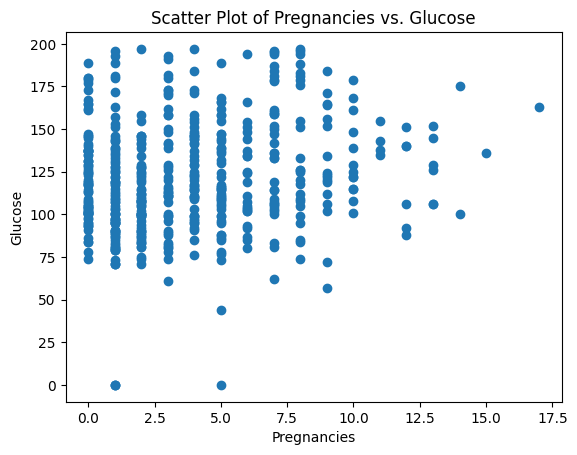

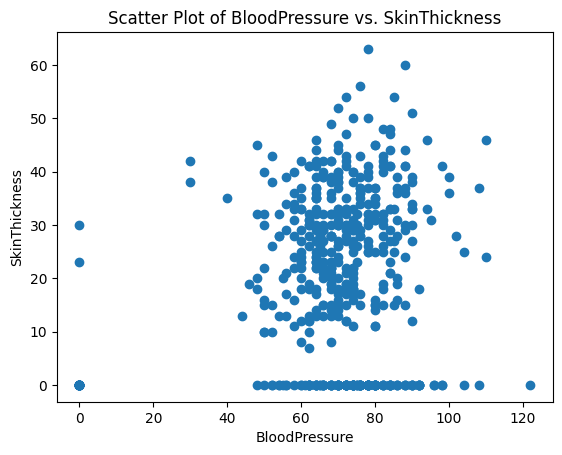

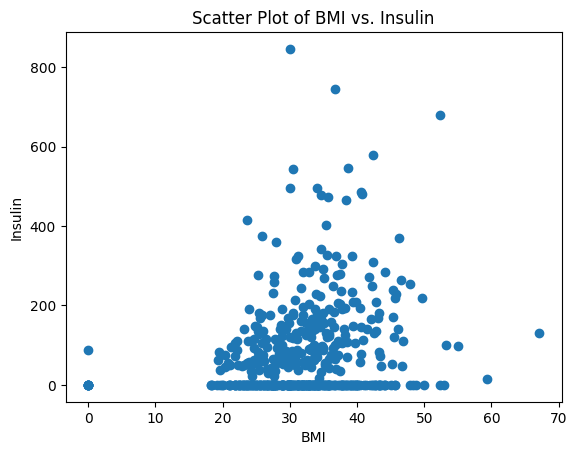

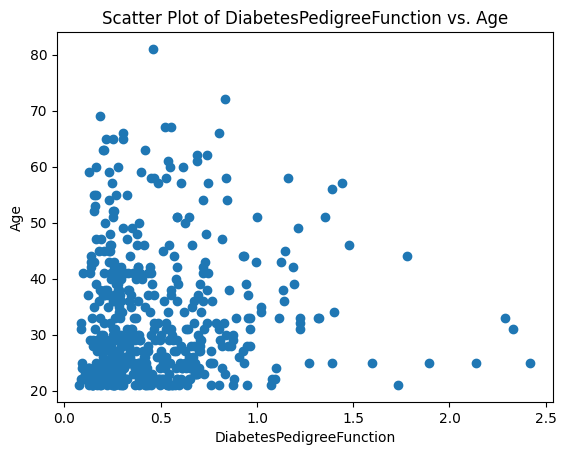

In [ ]:
df = pd.DataFrame(data)
column_combos = [('Pregnancies', 'Glucose'), ('BloodPressure', 'SkinThickness'),
                 ('BMI', 'Insulin'), ('DiabetesPedigreeFunction', 'Age')]

for col1, col2 in column_combos:
    plt.figure()
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs. {col2}')
    plt.show()


In [ ]:
df.isnull().values.any()

False

In [ ]:
data=data.select_dtypes(include='number')
from scipy import stats
z_scores_combined = np.abs(stats.zscore(data))

threshold = 3
df = data[(z_scores_combined < threshold).all(axis=1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
493,4,125,70,18,122,28.9,1.144,45,1
495,6,166,74,0,0,26.6,0.304,66,0
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
print(scaled_features)

[[ 0.69476177  0.91838657 -0.01695426 ...  0.21750463  0.57152517
   1.51127635]
 [-0.88521494 -1.18253563 -0.51767017 ... -0.81176724 -0.39127728
  -0.17488657]
 [ 1.32675245  2.08556557 -0.68457547 ... -1.2969954   0.72850383
  -0.08614115]
 ...
 [ 0.37876643 -0.34883634 -0.35076487 ... -0.89999054 -0.59709375
  -0.26363198]
 [-0.5692196  -1.31592751 -0.01695426 ... -0.2971313   0.29245199
  -0.70735907]
 [ 1.01075711  2.48574123 -0.18385956 ... -1.03232549 -1.04709924
   1.95500343]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

x train shape: (354, 8)
x test shape: (89, 8)
y train shape: (354,)
y test shape: (89,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='binary')
recall1 = recall_score(y_test, y_pred, average='binary')
f11 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)

Accuracy: 0.6966292134831461
Precision: 0.5
Recall: 0.4444444444444444
F1-score: 0.47058823529411764


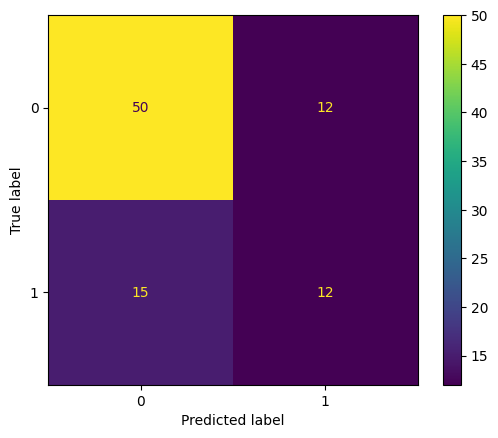

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = [0, 1]
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifier = SVC(kernel='sigmoid', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='binary')  # For binary classification
recall2 = recall_score(y_test, y_pred, average='binary')
f12 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.7078651685393258
Precision: 0.5172413793103449
Recall: 0.5555555555555556
F1-score: 0.5357142857142857


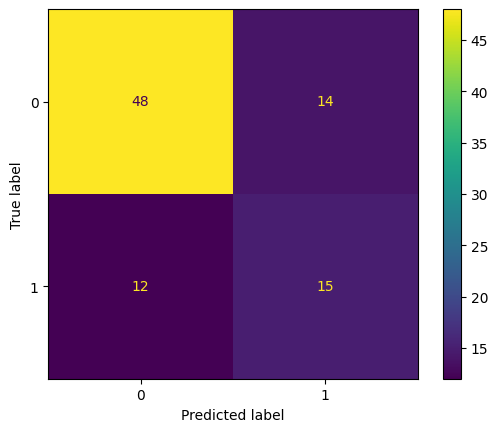

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = [0, 1]
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifier = SVC(kernel='poly', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='binary')  # For binary classification
recall3 = recall_score(y_test, y_pred, average='binary')
f13 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)

Accuracy: 0.7078651685393258
Precision: 0.5238095238095238
Recall: 0.4074074074074074
F1-score: 0.4583333333333333


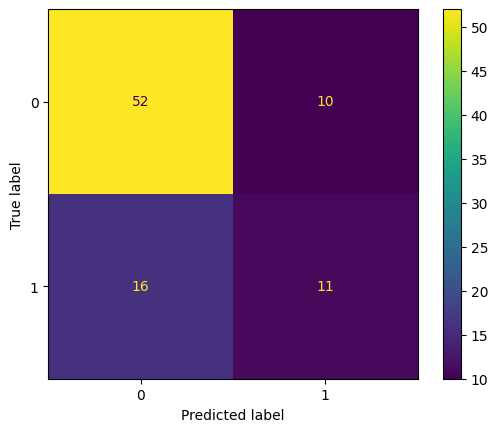

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = [0, 1]
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred, average='binary')  # For binary classification
recall4 = recall_score(y_test, y_pred, average='binary')
f14 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f14)

Accuracy: 0.7191011235955056
Precision: 0.5357142857142857
Recall: 0.5555555555555556
F1-score: 0.5454545454545454


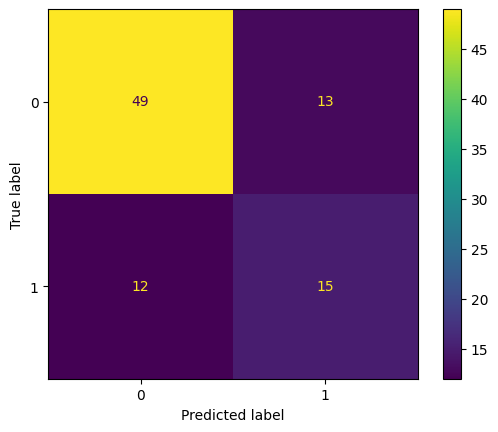

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = [0, 1]
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()